## Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Load Dataset

In [2]:
data = pd.read_excel('Online Retail.xlsx')

## Explore Data

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Clean Data

In [5]:
data.duplicated().sum()
data = data.drop_duplicates()

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [8]:
data = data.dropna(subset=['CustomerID'])

In [9]:
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [10]:
data.drop('Description', axis=1, inplace=True)

In [11]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Quantity     392692 non-null  int64         
 3   InvoiceDate  392692 non-null  datetime64[ns]
 4   UnitPrice    392692 non-null  float64       
 5   CustomerID   392692 non-null  float64       
 6   Country      392692 non-null  object        
 7   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 27.0+ MB


In [13]:
data['CustomerID'] = data['CustomerID'].astype(int)  

## RFM

In [14]:
ref_date = data['InvoiceDate'].max() + dt.timedelta(days=1)

In [15]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,'InvoiceNo': 'count','TotalPrice': 'sum'})

In [16]:
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPrice':'Monetary'}, inplace=True)

In [17]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [18]:
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

In [19]:
rfm.info()
rfm.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346 to 18287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4338 non-null   int64   
 1   Frequency  4338 non-null   int64   
 2   Monetary   4338 non-null   float64 
 3   R_score    4338 non-null   category
 4   F_score    4338 non-null   category
 5   M_score    4338 non-null   category
 6   RFM_Score  4338 non-null   object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 182.8+ KB


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,5,115
12347,2,182,4310.00,5,5,5,555
12348,75,31,1797.24,2,3,4,234
12349,19,73,1757.55,4,4,4,444
12350,310,17,334.40,1,2,2,122


## Seg


In [20]:
def seg(x):
    if x.startswith('5'):
        return 'Loyal Customer'
    elif x.startswith('4'):
        return 'Potential Loyalist'
    elif x.startswith('1'):
        return 'At Risk'
    else:
        return 'Others'

In [21]:
rfm['Seg'] = rfm['RFM_Score'].apply(seg)

In [22]:
rfm['Seg'].value_counts()

Seg
Others                1701
Potential Loyalist     904
Loyal Customer         868
At Risk                865
Name: count, dtype: int64

## Vis


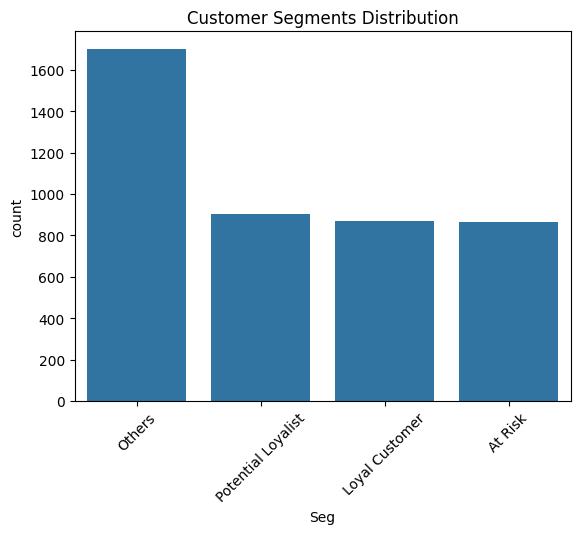

In [ ]:
sns.countplot(data=rfm, x='Seg', order=rfm['Seg'].value_counts().index)
plt.title("Customer Segments Distribution")
plt.xticks(rotation=45)
plt.show()

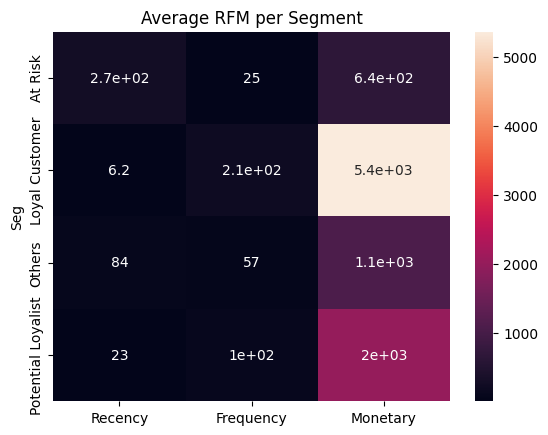

In [ ]:
segment_analysis = rfm.groupby('Seg')[['Recency','Frequency','Monetary']].mean()
sns.heatmap(segment_analysis, annot=True)
plt.title("Average RFM per Segment")
plt.show()